# Solving  2D equations numerically 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# n is the number of time steps
n=10**5

w_x=np.zeros(n)
w_y=np.zeros(n)

# initial value for w 
w_x[0]=0
w_y[0]=0

# dt -> time increment
dt=10**(-5)
sqrt_dt=np.sqrt(dt)


f_1=np.random.normal(0,1,size=n)
f_2=np.random.normal(0,1,size=n)

for i in range(1,n):
    # computing w(t) using Euler method 
    
    w_x[i]=  w_x[i-1]    -50*w_x[i-1]*dt   +2*w_y[i-1]*dt   +3*w_x[i-1]*w_y[i-1]*dt   +sqrt_dt*(f_1[i-1]+f_2[i-1])
    
    w_y[i]=  w_y[i-1]    -30*w_y[i-1]*dt   +10*w_x[i-1]*w_y[i-1]*dt   +sqrt_dt*(f_1[i-1]+f_2[i-1])
            
        

m_x=min(w_x)
m_y=min(w_y)

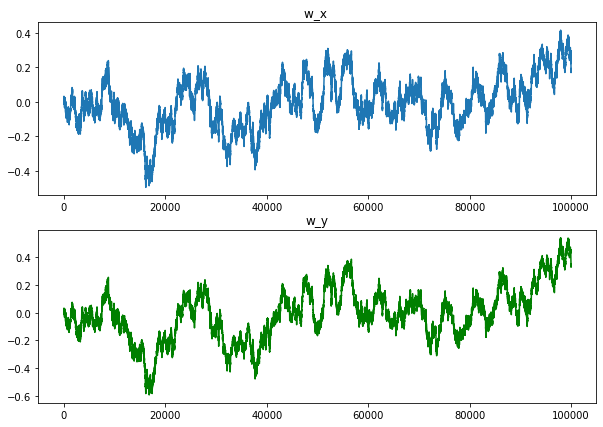

In [7]:
# ploting the answer seperatly 

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w_x)
plt.title('w_x ')

plt.subplot(2,1,2)
plt.plot(w_y,'g')
plt.title('w_y')


plt.show()

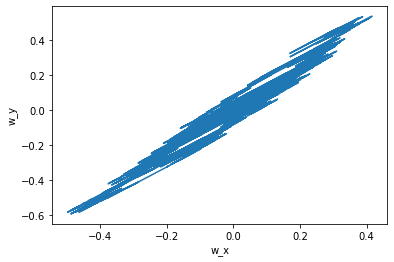

In [10]:
# ploting w_y - w_x graph

plt.plot(w_x,w_y)
plt.xlabel('w_x')
plt.ylabel('w_y')
plt.show()

In [11]:
# computing D1_. and D2_..
#l is the number of bins
l=7

D1_x=np.zeros((l,l))
D1_y=np.zeros((l,l))
D2_xx=np.zeros((l,l))
D2_xy=np.zeros((l,l))
D2_yx=np.zeros((l,l))
D2_yy=np.zeros((l,l))

nn=np.zeros((l,l))

d_x=(max(w_x)-min(w_x))/l
d_y=(max(w_y)-min(w_y))/l


for i in range(n-1):
    
    j=int(np.floor((w_x[i]-m_x)/d_x))
    k=int(np.floor((w_y[i]-m_y)/d_y))
    
    if j==l:
            j=l-1
    if k==l:
            k=l-1
            
    nn[j][k]+=1
    
    D1_x[j][k]=D1_x[j][k]+w_x[i+1]-w_x[i]
    D1_y[j][k]=D1_y[j][k]+w_y[i+1]-w_y[i]
    D2_xx[j][k]+=(w_x[i+1]-w_x[i])*(w_x[i+1]-w_x[i])
    D2_xy[j][k]+=(w_x[i+1]-w_x[i])*(w_y[i+1]-w_y[i])
    D2_yx[j][k]+=(w_y[i+1]-w_y[i])*(w_x[i+1]-w_x[i])
    D2_yy[j][k]+=(w_y[i+1]-w_y[i])*(w_y[i+1]-w_y[i])

    
D1_x=D1_x/(nn*dt)
D1_y=D1_y/(nn*dt)
D2_xx=D2_xx/(dt*nn)
D2_xy=D2_xy/(dt*nn)
D2_yx=D2_yx/(dt*nn)
D2_yy=D2_yy/(dt*nn)

<ipython-input-11-b328fc53ed22>:38: RuntimeWarning: invalid value encountered in true_divide
  D1_x=D1_x/(nn*dt)
<ipython-input-11-b328fc53ed22>:39: RuntimeWarning: invalid value encountered in true_divide
  D1_y=D1_y/(nn*dt)
<ipython-input-11-b328fc53ed22>:40: RuntimeWarning: invalid value encountered in true_divide
  D2_xx=D2_xx/(dt*nn)
<ipython-input-11-b328fc53ed22>:41: RuntimeWarning: invalid value encountered in true_divide
  D2_xy=D2_xy/(dt*nn)
<ipython-input-11-b328fc53ed22>:42: RuntimeWarning: invalid value encountered in true_divide
  D2_yx=D2_yx/(dt*nn)
<ipython-input-11-b328fc53ed22>:43: RuntimeWarning: invalid value encountered in true_divide
  D2_yy=D2_yy/(dt*nn)


In [18]:
D2_xx.shape

(7, 7)

In [12]:
# exporting the calculated Ds in the form of mat file in order to plot them using Matlab

import numpy, scipy.io

scipy.io.savemat('/home/fahimeh/Desktop/D1_y.mat', mdict={'D1_y': D1_y})
scipy.io.savemat('/home/fahimeh/Desktop/D1_x.mat', mdict={'D1_x': D1_x})

scipy.io.savemat('/home/fahimeh/Desktop/D2_xx.mat', mdict={'D2_xx': D2_xx})
scipy.io.savemat('/home/fahimeh/Desktop/D2_xy.mat', mdict={'D2_xy': D2_xy})
scipy.io.savemat('/home/fahimeh/Desktop/D2_yx.mat', mdict={'D2_yx': D2_yx})
scipy.io.savemat('/home/fahimeh/Desktop/D2_yy.mat', mdict={'D2_yy': D2_yy})

In [13]:
# finding g

D=np.zeros((2*l,2*l))

D[:l,:l]=D2_xx
D[:l,l:]=D2_xy
D[l:,:l]=D2_yx
D[l:,l:]=D2_yy

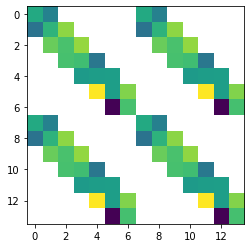

In [14]:
plt.imshow(D)
plt.show()

In [15]:
D_12=D**(1/2)

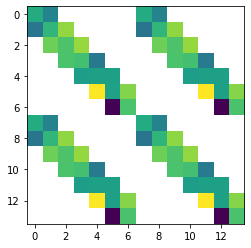

In [16]:
plt.imshow(D_12)
plt.show()

In [ ]:
# '/home/fahimeh/Desktop/D2_xx.mat'